# Load libraries and read the data

In [496]:
#pip install hvplot

In [497]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import hvplot
import hvplot.pandas

%matplotlib inline

In [498]:
pd.set_option('display.max_columns', None)

In [499]:
df = pd.read_csv('../input/ibm-hr-analytics-attrition-dataset//WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Exploratory Data Analysis

In [500]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [501]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [503]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [504]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [505]:
df.shape

(1470, 35)

In [506]:
df.shape

(1470, 35)

 # 📉 Data Visualisation 

In [507]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [508]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [509]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

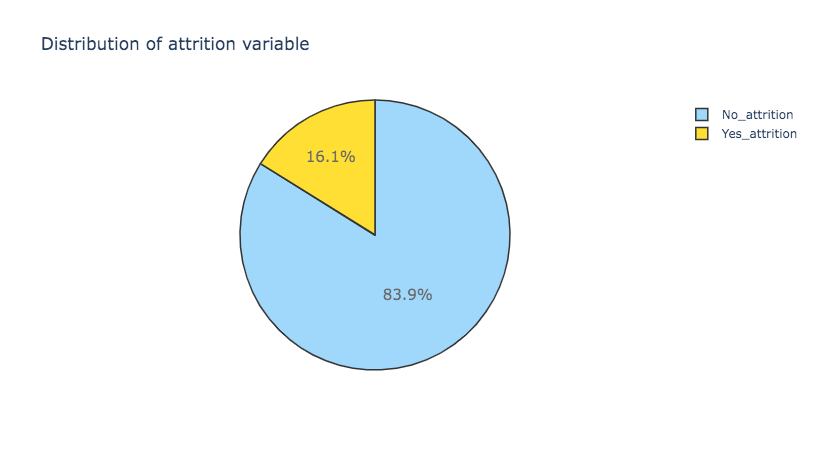

In [510]:
# alternative
trace = go.Pie(labels = ['No_attrition', 'Yes_attrition'], values = df['Attrition'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of attrition variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

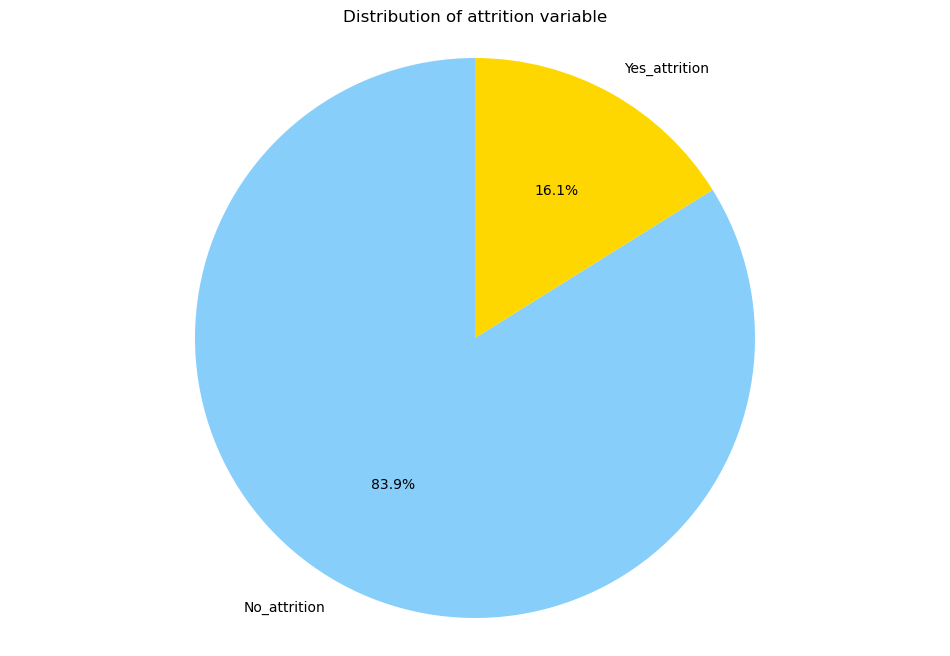

In [511]:
# Data
labels = ['No_attrition', 'Yes_attrition']
values = df['Attrition'].value_counts()
colors = ['lightskyblue', 'gold']

# Plotting
plt.figure(figsize=(12,8))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of attrition variable')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()


In [512]:
df.hvplot.hist(y='DistanceFromHome', by='Attrition', subplots=False, width=600, height=300, bins=30)


:NdOverlay   [Attrition]
   :Histogram   [DistanceFromHome]   (DistanceFromHome_count)

In [513]:
df.hvplot.hist(y='Education', by='Attrition', subplots=False, width=600, height=300)


:NdOverlay   [Attrition]
   :Histogram   [Education]   (Education_count)

<Axes: xlabel='Education', ylabel='count'>

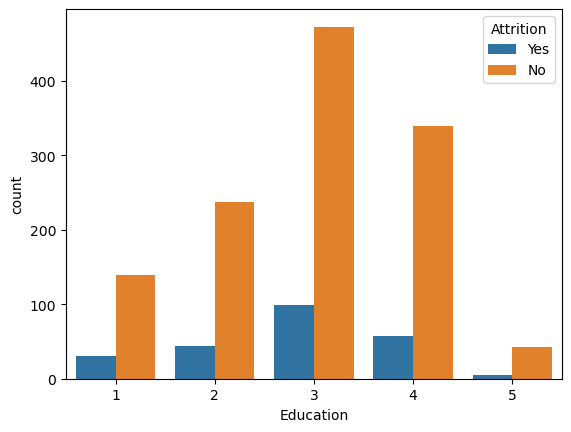

In [514]:
# alternative plot using seaborn
sns.countplot(data=df,x='Education',hue='Attrition')

In [515]:
df.hvplot.hist(y='JobLevel', by='Attrition', subplots=False, width=600, height=300)


:NdOverlay   [Attrition]
   :Histogram   [JobLevel]   (JobLevel_count)

<Axes: xlabel='JobLevel', ylabel='count'>

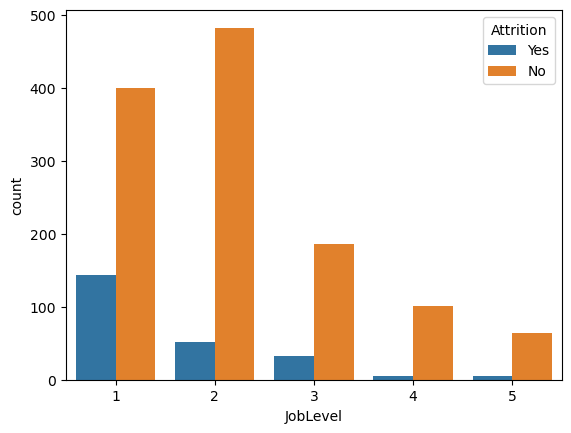

In [516]:
# alternative plot using seaborn
sns.countplot(data=df,x='JobLevel',hue='Attrition')

In [517]:
df.hvplot.hist(y='RelationshipSatisfaction', by='Attrition', subplots=False, width=600, height=300)


:NdOverlay   [Attrition]
   :Histogram   [RelationshipSatisfaction]   (RelationshipSatisfaction_count)

<Axes: xlabel='RelationshipSatisfaction', ylabel='count'>

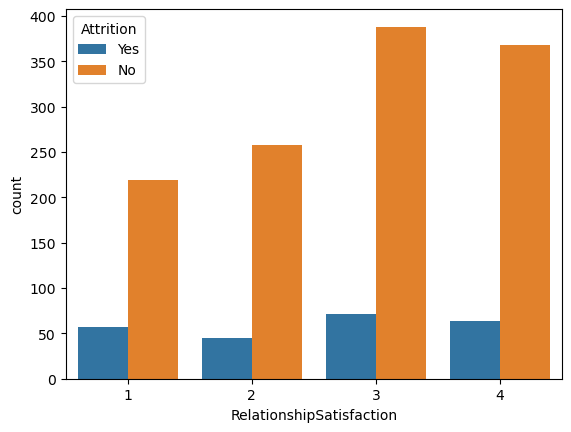

In [518]:
# alternative plot using seaborn
sns.countplot(data=df,x='RelationshipSatisfaction',hue='Attrition')

In [519]:
df.hvplot.hist(y='EnvironmentSatisfaction', by='Attrition', subplots=False, width=600, height=300)


:NdOverlay   [Attrition]
   :Histogram   [EnvironmentSatisfaction]   (EnvironmentSatisfaction_count)

<Axes: xlabel='EnvironmentSatisfaction', ylabel='count'>

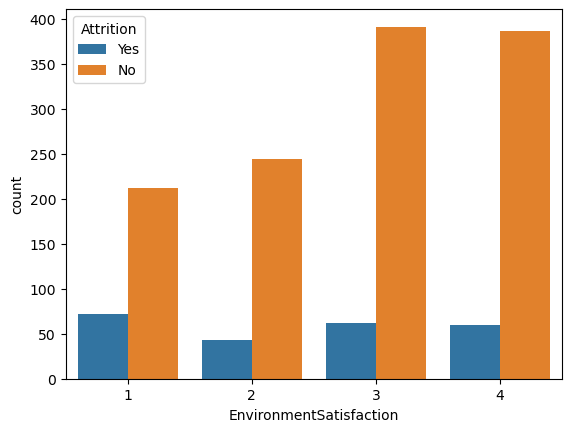

In [520]:
# alternative plot using seaborn
sns.countplot(data=df,x='EnvironmentSatisfaction',hue='Attrition')

In [521]:
df.hvplot.hist(y='JobInvolvement', by='Attrition', subplots=False, width=600, height=300)


:NdOverlay   [Attrition]
   :Histogram   [JobInvolvement]   (JobInvolvement_count)

<Axes: xlabel='JobInvolvement', ylabel='count'>

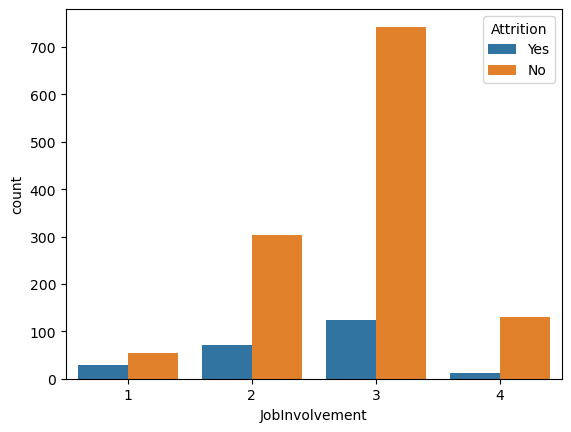

In [522]:
# alternative plot using seaborn
sns.countplot(data=df,x='JobInvolvement',hue='Attrition')

In [523]:
df.hvplot.hist(y='NumCompaniesWorked', by='Attrition', subplots=False, width=600, height=300)


:NdOverlay   [Attrition]
   :Histogram   [NumCompaniesWorked]   (NumCompaniesWorked_count)

In [524]:
df.hvplot.hist(y='PercentSalaryHike', by='Attrition', subplots=False, width=600, height=300)


:NdOverlay   [Attrition]
   :Histogram   [PercentSalaryHike]   (PercentSalaryHike_count)

In [525]:
df.hvplot.hist(y='MonthlyIncome', by='Attrition', subplots=False, width=600, height=300, bins=20)


:NdOverlay   [Attrition]
   :Histogram   [MonthlyIncome]   (MonthlyIncome_count)

In [526]:
df.hvplot.hist(y='Age', by='Attrition', subplots=False, width=600, height=300, bins=35)


:NdOverlay   [Attrition]
   :Histogram   [Age]   (Age_count)

In [527]:
df.hvplot.hist(y='YearsAtCompany', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [YearsAtCompany]   (YearsAtCompany_count)

In [528]:
df.hvplot.hist(y='TotalWorkingYears', by='Attrition', subplots=False, width=600, height=300, bins=35)


:NdOverlay   [Attrition]
   :Histogram   [TotalWorkingYears]   (TotalWorkingYears_count)

In [529]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [530]:
df[df['Attrition']=='Yes'].groupby('Department').count().sort_values('Age',ascending=False)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Department,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Research & Development,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133
Sales,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92
Human Resources,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


In [531]:
df[df['Attrition']=='No'].groupby('Department').count().sort_values('Age',ascending=False)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Department,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Research & Development,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828
Sales,354,354,354,354,354,354,354,354,354,354,354,354,354,354,354,354,354,354,354,354,354,354,354,354,354,354,354,354,354,354,354,354,354,354
Human Resources,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51


<Axes: xlabel='Department', ylabel='count'>

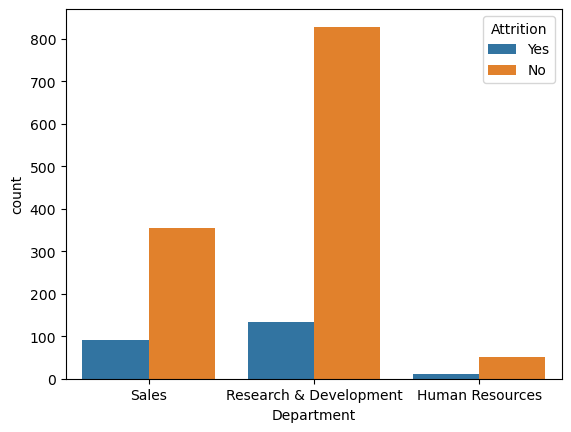

In [532]:
sns.countplot(data=df,x='Department',hue='Attrition')


<Axes: xlabel='BusinessTravel', ylabel='count'>

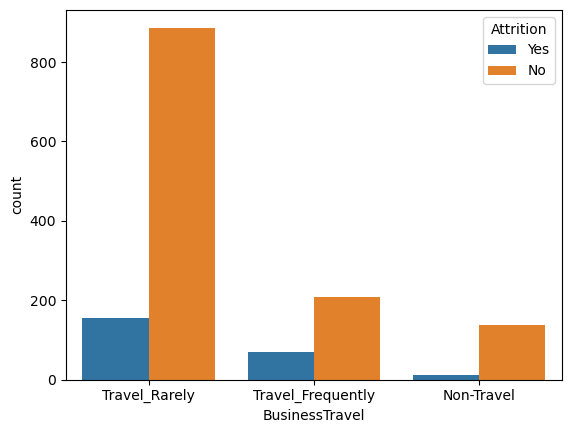

In [533]:
sns.countplot(x='BusinessTravel', hue='Attrition', data=df)


In [534]:
df.groupby(['MaritalStatus','Attrition']).count()

Age  BusinessTravel  DailyRate  Department  \
MaritalStatus Attrition                                               
Divorced      No         294             294        294         294   
              Yes         33              33         33          33   
Married       No         589             589        589         589   
              Yes         84              84         84          84   
Single        No         350             350        350         350   
              Yes        120             120        120         120   

                         DistanceFromHome  Education  EducationField  \
MaritalStatus Attrition                                                
Divorced      No                      294        294             294   
              Yes                      33         33              33   
Married       No                      589        589             589   
              Yes                      84         84              84   
Single        No                      350        350             350   
              Yes                     120        120             120   

                         EmployeeCount  EmployeeNumber  \
MaritalStatus Attrition                                  
Divorced      No                   294             294   
              Yes                   33              33   
Married       No                   589             589   
              Yes                   84              84   
Single        No                   350             350   
              Yes                  120             120   

                         EnvironmentSatisfaction  Gender  HourlyRate  \
MaritalStatus Attrition                                                
Divorced      No                             294     294         294   
              Yes                             33      33          33   
Married       No                             589     589         589   
              Yes                             84      84          84   
Single        No                             350     350         350   
              Yes                            120     120         120   

                         JobInvolvement  JobLevel  JobRole  JobSatisfaction  \
MaritalStatus Attrition                                                       
Divorced      No                    294       294      294              294   
              Yes                    33        33       33               33   
Married       No                    589       589      589              589   
              Yes                    84        84       84               84   
Single        No                    350       350      350              350   
              Yes                   120       120      120              120   

                         MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
MaritalStatus Attrition                                                   
Divorced      No                   294          294                 294   
              Yes                   33           33                  33   
Married       No                   589          589                 589   
              Yes                   84           84                  84   
Single        No                   350          350                 350   
              Yes                  120          120                 120   

                         Over18  OverTime  PercentSalaryHike  \
MaritalStatus Attrition                                        
Divorced      No            294       294                294   
              Yes            33        33                 33   
Married       No            589       589                589   
              Yes            84        84                 84   
Single        No            350       350                350   
              Yes           120       120                120   

                         PerformanceRating  RelationshipSatisfaction  \
MaritalStatus Attr

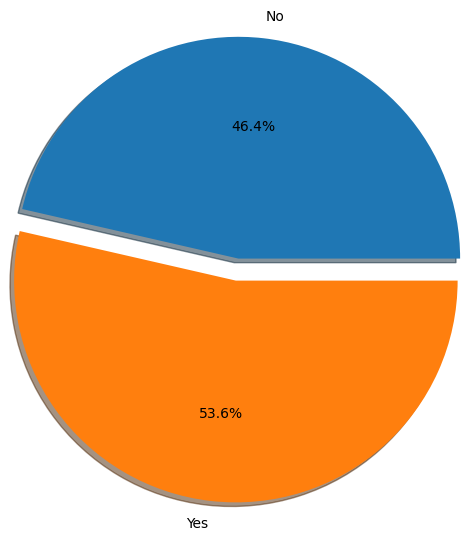

In [535]:
r = df[df['Attrition']=='Yes'].groupby('OverTime')['OverTime'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['No', 'Yes'], radius=1.5, autopct='%1.1f%%',  shadow=True)
plt.show()

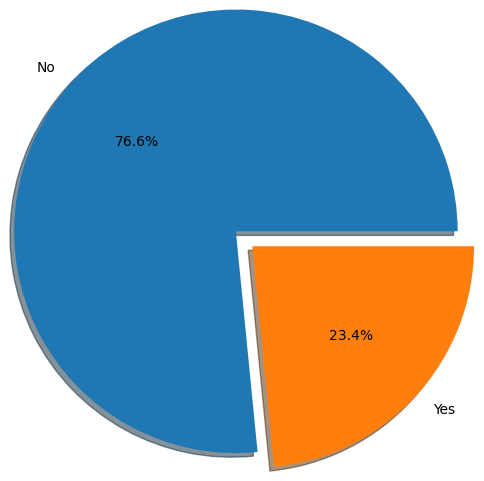

In [536]:
r = df[df['Attrition']=='No'].groupby('OverTime')['OverTime'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['No', 'Yes'], radius=1.5, autopct='%1.1f%%',  shadow=True)
plt.show()

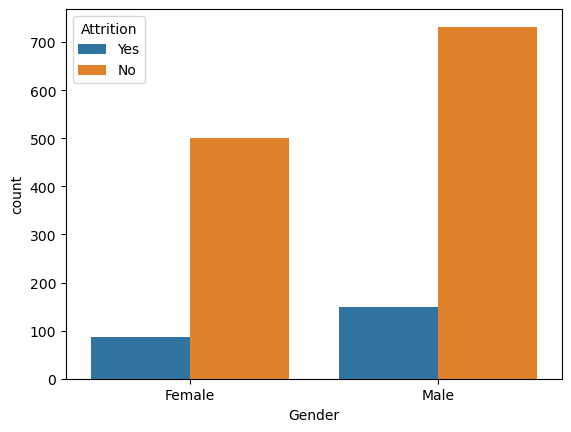

In [537]:
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.show()

# Conclusions:
- The workers with low JobLevel, MonthlyIncome, YearAtCompany, and TotalWorkingYears are more likely to quit there jobs.
- BusinessTravel : The workers who travel alot are more likely to quit then other employees.

- Department : The worker in Research & Development are more likely to stay then the workers on other departement.

- EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

- Gender : The Male are more likely to quit.

- JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

- MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.

- OverTime : The workers who work more hours are likely to quit then others.

In [538]:
df[df['Attrition']=='Yes'].groupby('OverTime').count()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
OverTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110
Yes,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127


In [539]:
df[df['Attrition']=='No'].groupby('OverTime').count()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
OverTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944
Yes,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289,289


In [540]:
# OverTime : The workers who work more hours are likely to quit then others.

In [541]:
df.groupby(['OverTime','Attrition']).count()

Age  BusinessTravel  DailyRate  Department  \
OverTime Attrition                                               
No       No         944             944        944         944   
         Yes        110             110        110         110   
Yes      No         289             289        289         289   
         Yes        127             127        127         127   

                    DistanceFromHome  Education  EducationField  \
OverTime Attrition                                                
No       No                      944        944             944   
         Yes                     110        110             110   
Yes      No                      289        289             289   
         Yes                     127        127             127   

                    EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
OverTime Attrition                                                           
No       No                   944             944                      944   
         Yes                  110             110                      110   
Yes      No                   289             289                      289   
         Yes                  127             127                      127   

                    Gender  HourlyRate  JobInvolvement  JobLevel  JobRole  \
OverTime Attrition                                                          
No       No            944         944             944       944      944   
         Yes           110         110             110       110      110   
Yes      No            289         289             289       289      289   
         Yes           127         127             127       127      127   

                    JobSatisfaction  MaritalStatus  MonthlyIncome  \
OverTime Attrition                                                  
No       No                     944            944            944   
         Yes                    110            110            110   
Yes      No                     289            289            289   
         Yes                    127            127            127   

                    MonthlyRate  NumCompaniesWorked  Over18  \
OverTime Attrition                                            
No       No                 944                 944     944   
         Yes                110                 110     110   
Yes      No                 289                 289     289   
         Yes                127                 127     127   

                    PercentSalaryHike  PerformanceRating  \
OverTime Attrition                                         
No       No                       944                944   
         Yes                      110                110   
Yes      No                       289                289   
         Yes                      127                127   

                    RelationshipSatisfaction  StandardHours  StockOptionLevel  \
OverTime Attrition                                                              
No       No                              944            944               944   
         Yes                             110            110               110   
Yes      No                              289            289               289   
         Yes                             127            127               127   

                    TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
OverTime Attrition                                                              
No       No                       944                    944              944   
         Yes                      110                    110              110   
Yes      No                       289                    289              289   
         Yes                      127                    127              127   

                    YearsAtCompany  YearsInCurrentRole  \
OverTime Attrition                                       
No       No                    944         

/tmp/ipykernel_32/3780277067.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

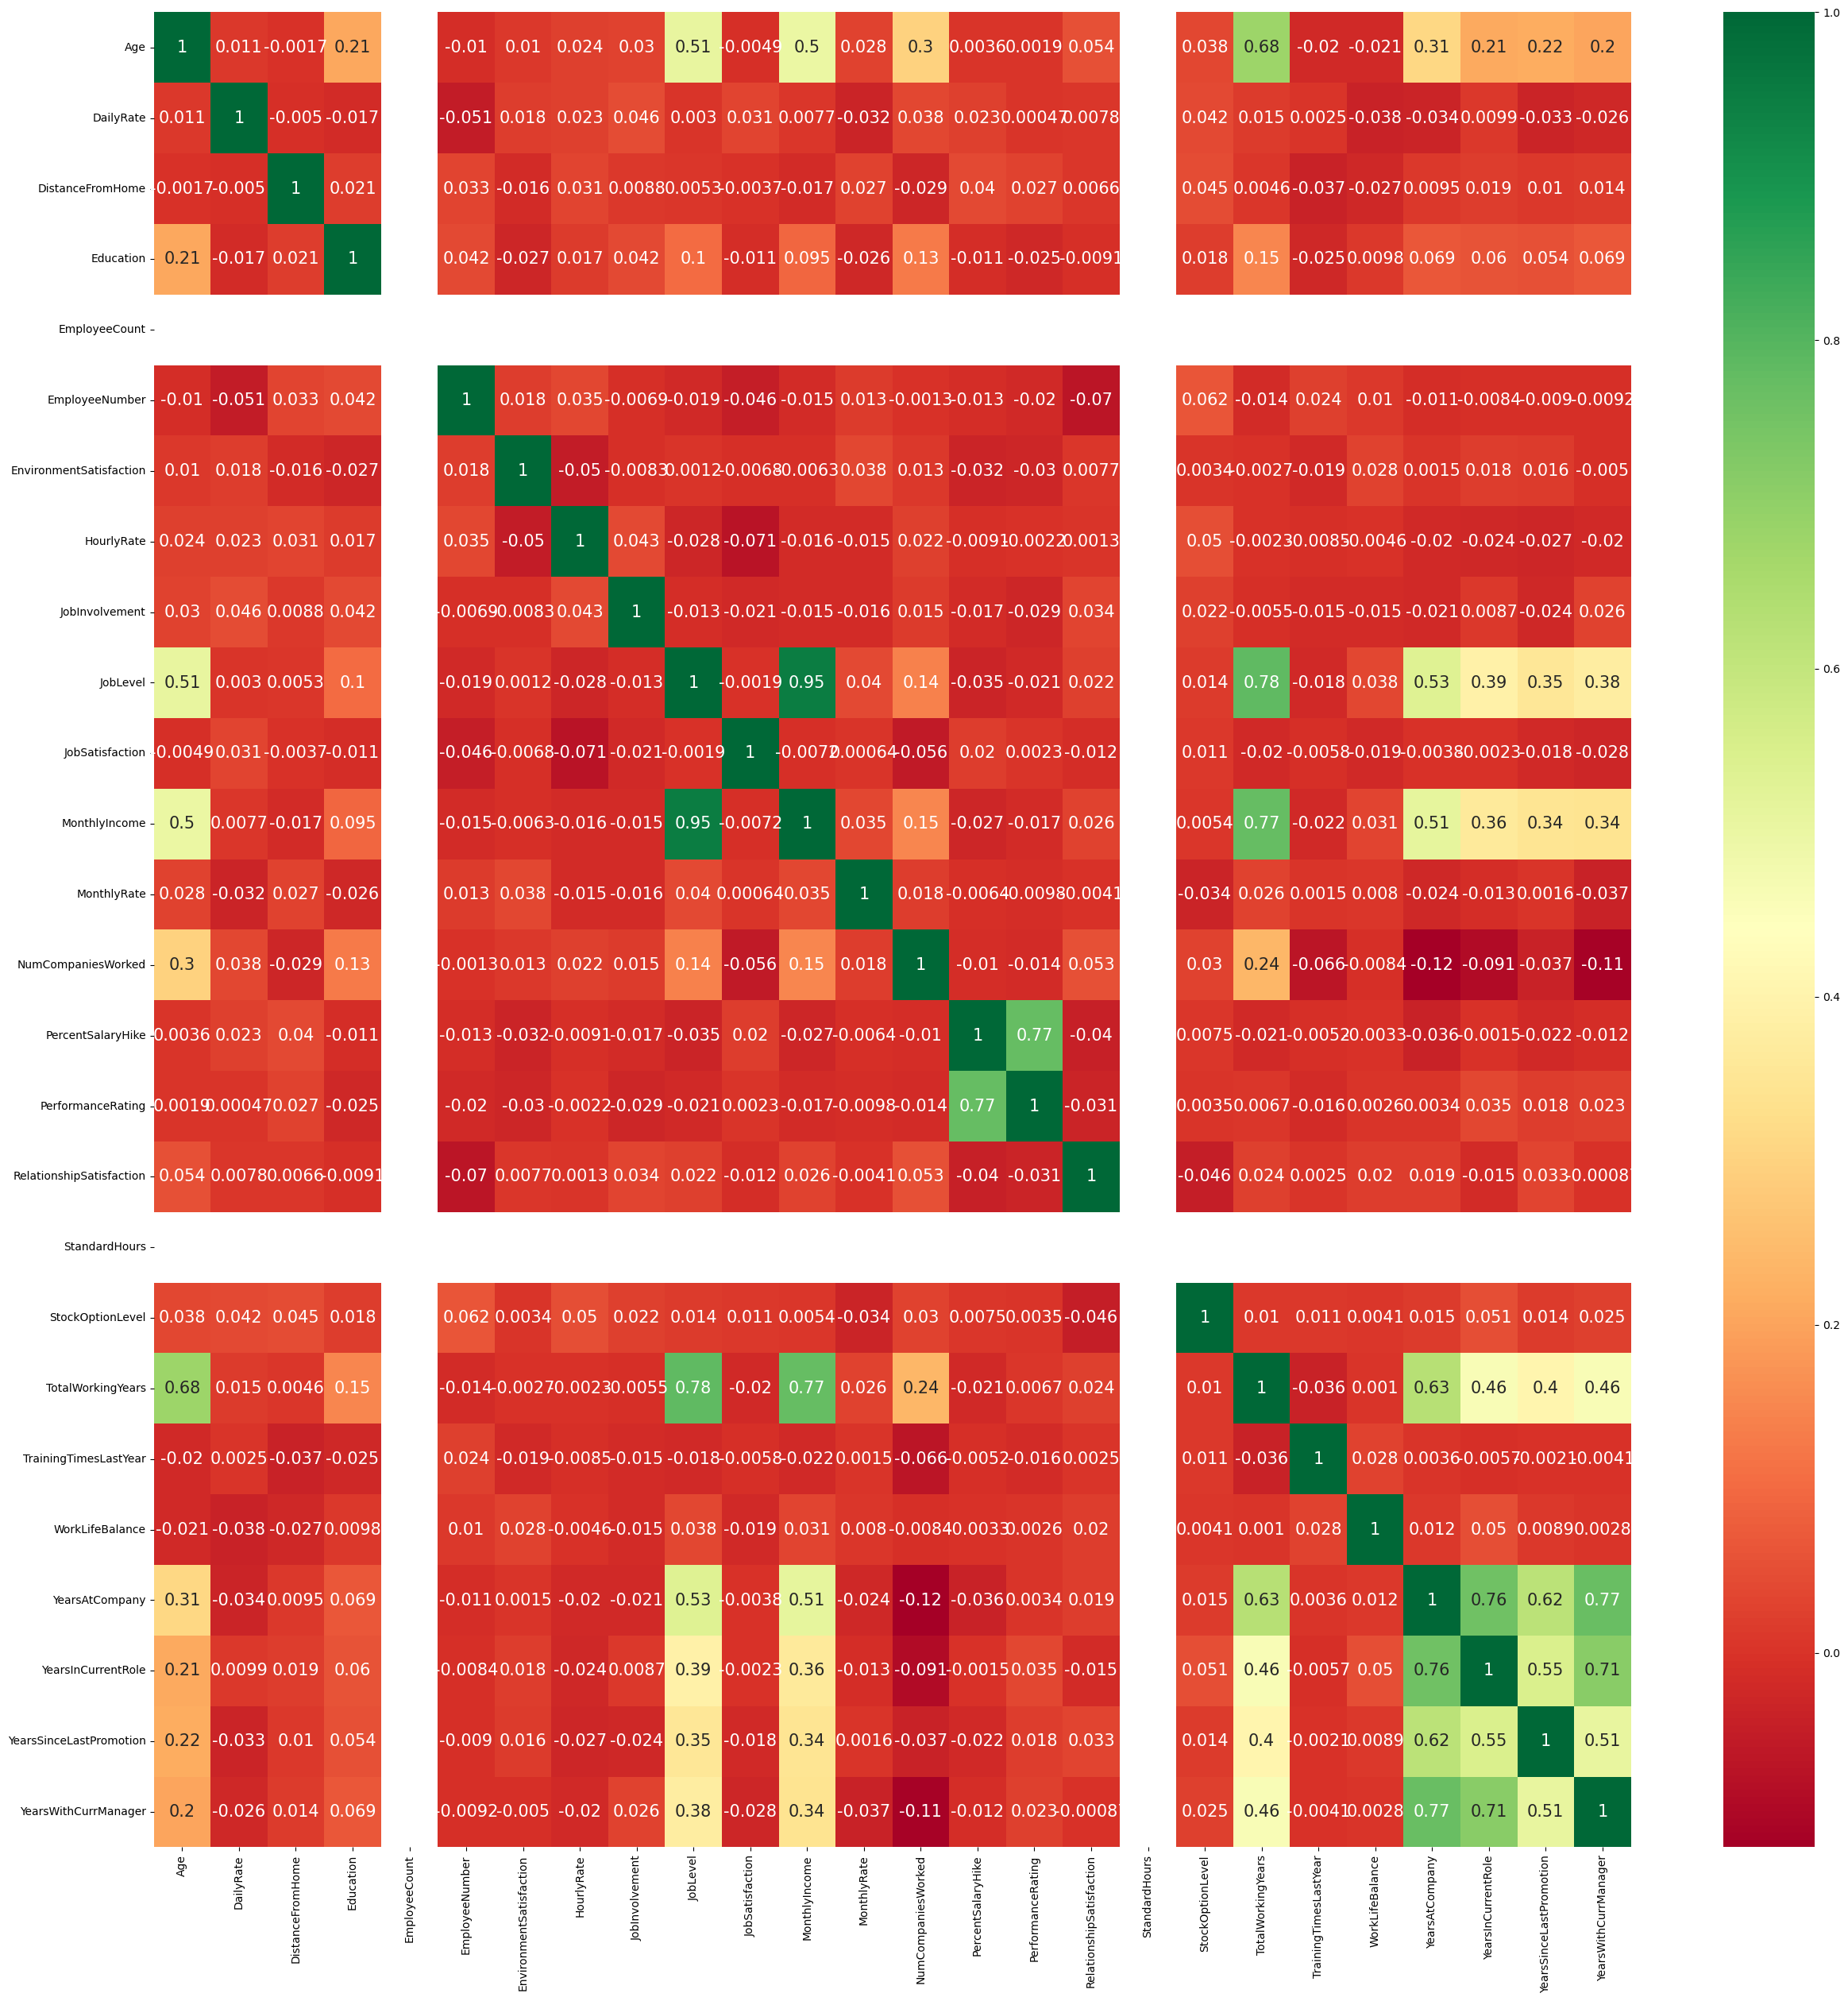

In [542]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

# Analysis of correlation results
- Monthly income is highly correlated with Job level.
- Job level is highly correlated with total working hours.
- Monthly income is highly correlated with total working hours.
- Age is also positively correlated with the Total working hours.

# Feature Engineering

In [543]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("="*55)  

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

#### We notice that 'EmployeeCount', 'Over18', 'StandardHours' have only one unique values. This features aren't useful for us, So we are going to drop those columns.

In [544]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)

#### I will drop the EmployeeNumber feature as it contains unique values for every employee. Additionally, I will remove TotalWorkingYears and JobLevel as they exhibit high correlation with other features, which could lead to multicollinearity issues.

In [545]:
df.drop(['TotalWorkingYears','JobLevel','EmployeeNumber'],axis=1,inplace=True)

In [546]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        
df['Attrition'] = df.Attrition.astype("category").cat.codes

In [547]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,3,3,2,2,2,2


In [548]:
categorical_col

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [549]:
categorical_col.remove('Attrition')


In [550]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [551]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,7,4,2,5993,19479,8,1,11,3,1,0,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,6,2,1,5130,24907,1,0,23,4,4,1,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,2,3,2,2090,2396,6,1,15,3,2,0,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,6,3,1,2909,23159,1,1,11,3,3,0,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,2,2,1,3468,16632,9,0,12,3,4,1,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,41,4,2,4,1,2571,12290,4,0,17,3,3,1,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,42,2,0,1,1,9991,21457,4,0,15,3,1,1,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,87,4,4,2,1,6142,5174,1,1,20,4,2,1,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,63,2,7,2,1,5390,13243,2,0,14,3,4,0,3,2,9,6,0,8


In [552]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Random Forest

In [553]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)


RandomForestClassifier()

In [554]:
y_pred = rf_clf.predict(X_test)

In [555]:
from sklearn.metrics import classification_report,confusion_matrix

In [556]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       320
           1       0.50      0.08      0.14        48

    accuracy                           0.87       368
   macro avg       0.69      0.54      0.54       368
weighted avg       0.83      0.87      0.83       368



### Logistic Regression

In [557]:

X = df.drop('Attrition', axis=1)
y = df.Attrition

In [558]:
X_train_first, X_test_first, y_train_first, y_test_first = train_test_split(
   X, y,test_size= 0.25, random_state = 42)


In [559]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
sc = StandardScaler()
X_train_first = sc.fit_transform(X_train_first)
X_test_first = sc.transform(X_test_first)

In [560]:
from sklearn.linear_model import LogisticRegression

logreg_first = LogisticRegression(max_iter= 10000)
logreg_first.fit(X_train_first, y_train_first)

y_pred_first = logreg_first.predict(X_test_first)

In [561]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test_first,y_pred_first))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       320
           1       0.73      0.33      0.46        48

    accuracy                           0.90       368
   macro avg       0.82      0.66      0.70       368
weighted avg       0.88      0.90      0.88       368



In [562]:
print(confusion_matrix(y_test_first,y_pred_first))

[[314   6]
 [ 32  16]]


In [563]:
### Imbalance dataset

df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

## Downsampling the imbalanced data

In [564]:
df2 = (df.groupby('Attrition', as_index = False)).apply(lambda x: x.sample(n=237)).reset_index(drop = True)

In [565]:
df2['Attrition'].value_counts()

0    237
1    237
Name: Attrition, dtype: int64

In [566]:
X = df2.drop(['Attrition'],axis=1)
y = df2['Attrition']

In [567]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 42)

In [568]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [569]:
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [570]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        47
           1       0.76      0.79      0.78        48

    accuracy                           0.77        95
   macro avg       0.77      0.77      0.77        95
weighted avg       0.77      0.77      0.77        95



In [571]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

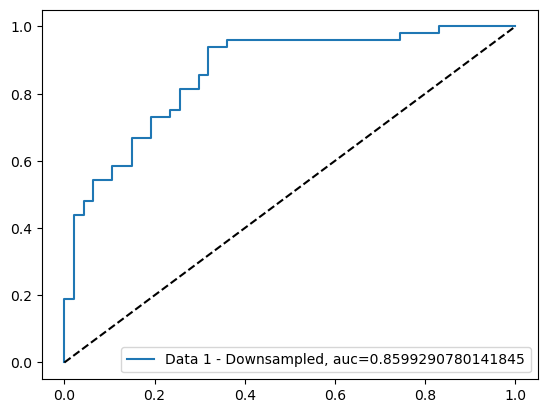

In [572]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]

fpr,tpr,_ = roc_curve(y_test,y_pred_proba)
auc= roc_auc_score(y_test,y_pred_proba)

plt.plot(fpr, tpr, label= "Data 1 - Downsampled, auc=" +str(auc))
plt.plot([0,1], [0,1], color = "black", linestyle = '--')
plt.legend(loc=4)
plt.show()

## Stratified Sampling

In [573]:
X2 = df.drop('Attrition',axis=1)
y2 = df['Attrition']

In [574]:
X_train_str, X_test_str, y_train_str, y_test_str = train_test_split(
    X2,y2,test_size=0.20, random_state=42, stratify= y2)

In [575]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
sc = StandardScaler()
X_train_str = sc.fit_transform(X_train_str)
X_test_str = sc.transform(X_test_str)

In [576]:
# Initiate Model

logreg_str = LogisticRegression(max_iter = 10000)
# fit
logreg_str.fit(X_train_str, y_train_str)
# predict
ypred_str = logreg_str.predict(X_test_str)

In [577]:
# with stratified sampling
print(classification_report(y_test_str, ypred_str))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       247
           1       0.70      0.40      0.51        47

    accuracy                           0.88       294
   macro avg       0.80      0.69      0.72       294
weighted avg       0.86      0.88      0.86       294



In [578]:
print(confusion_matrix(y_test_str,ypred_str))

[[239   8]
 [ 28  19]]


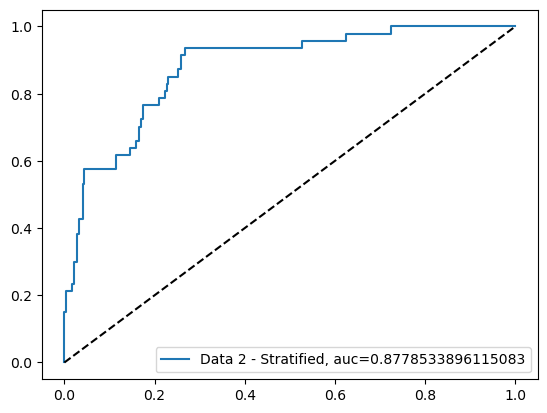

In [579]:
# with stratified

y_pred_proba_str = logreg.predict_proba(X_test_str)[::,1]

fpr_str,tpr_str,_ = roc_curve(y_test_str,y_pred_proba_str)
auc_str= roc_auc_score(y_test_str,y_pred_proba_str)

plt.plot(fpr_str, tpr_str, label= "Data 2 - Stratified, auc=" +str(auc_str))
plt.plot([0,1], [0,1], color = "black", linestyle = '--')
plt.legend(loc=4)
plt.show()

# With class_weight = 'balanced

In [580]:
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X2, y2, test_size =0.25, random_state=42)

In [581]:
# intialise model

logreg_bal = LogisticRegression(max_iter=10000, class_weight = 'balanced')

# fit
logreg_bal.fit(X_train_bal, y_train_bal)
# predict
y_pred_bal = logreg_bal.predict(X_test_bal)

In [582]:
print(classification_report(y_test_bal,y_pred_bal))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       320
           1       0.28      0.60      0.38        48

    accuracy                           0.74       368
   macro avg       0.60      0.68      0.61       368
weighted avg       0.84      0.74      0.78       368



In [583]:
print(confusion_matrix(y_test_bal,y_pred_bal))

[[245  75]
 [ 19  29]]


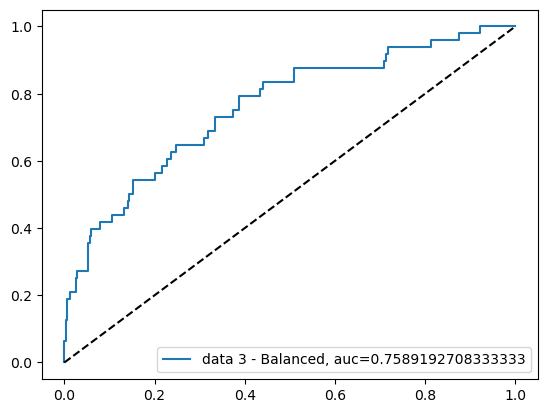

In [584]:
y_pred_proba_bal = logreg_bal.predict_proba(X_test_bal)[::,1]

fpr_bal,tpr_bal,_ = roc_curve(y_test_bal,y_pred_proba_bal)
auc_bal= roc_auc_score(y_test_bal,y_pred_proba_bal)

plt.plot(fpr_bal, tpr_bal, label= "data 3 - Balanced, auc=" +str(auc_bal))
plt.plot([0,1], [0,1], color = "black", linestyle = '--')
plt.legend(loc=4)
plt.show()

# ROC for all models

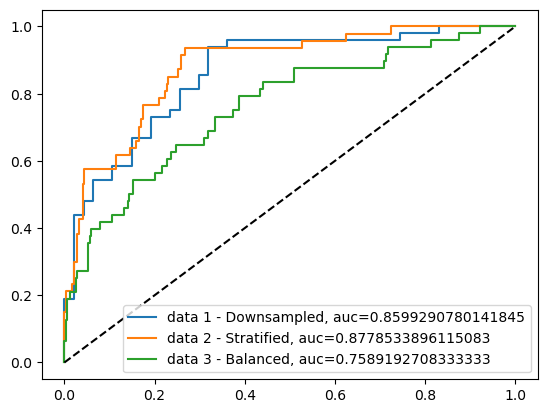

In [585]:
plt.plot(fpr, tpr, label= "data 1 - Downsampled, auc=" +str(auc))
plt.plot(fpr_str, tpr_str, label= "data 2 - Stratified, auc=" +str(auc_str))
plt.plot(fpr_bal, tpr_bal, label= "data 3 - Balanced, auc=" +str(auc_bal))

plt.plot([0,1], [0,1], color = "black", linestyle = '--')
plt.legend(loc=4)
plt.show()


# SMOTE

In [586]:
X = df.drop('Attrition', axis=1)
y = df.Attrition

In [587]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
smote = SMOTE(sampling_strategy='auto', random_state=42,k_neighbors=3)
X_resampled1, y_resampled1 = smote.fit_resample(X_train, y_train)
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_resampled1, y_resampled1)
y_pred = logreg.predict(X_resampled1)
print(classification_report(y_resampled1, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       978
           1       0.79      0.82      0.80       978

    accuracy                           0.80      1956
   macro avg       0.80      0.80      0.80      1956
weighted avg       0.80      0.80      0.80      1956



In [588]:
print(confusion_matrix(y_resampled1, y_pred))

[[771 207]
 [180 798]]
